본 강좌에서는 시계열예측을 해보겠습니다. 다음과 같은 순서로 진행하겠습니다.

1. 데이터셋 준비하기
1. 모델 구성하기
1. 모델 엮기
1. 모델 학습시키기
1. 모델 사용하기

---

### 데이터셋 준비하기

    "Month","International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60"
    "1949-01",112
    "1949-02",118
    "1949-03",132
    "1949-04",129
    "1949-05",121

[다운](https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line)

    X1 X2 X3 Y
    112 118 132 129 
    118 132 129 121 
    132 129 121 135 
    129 121 135 148 
    121 135 148 148

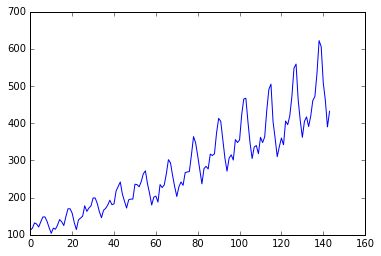

In [21]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline 

dataset = pandas.read_csv( 'warehouse/international-airline-passengers.csv' , usecols=[1], engine= 'python' , skipfooter=3)
plt.plot(dataset)
plt.show()

In [31]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv( 'warehouse/international-airline-passengers.csv' , usecols=[1],
    engine= 'python' , skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype( 'float32' )
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

---

### 모델 구성하기

Dense 클래스를 사용하여 완전 연결 레이어(Fully Connected Layer)를 정의할 수 있다.

- 첫번째 인자 : 뉴런의 수
- 두번째 인자 : 네트워크 가중치(network weight) 초기화 방법
 - uniform : 균등분포 (uniform distribution)의 작은 난수들로 초기화 (0~0.05 사이)
 - normal : 가우시안 분포 (Gaussian distribution)로 생성된 작은 난수들로 초기화 
- 세번째 인자 : 활성화 함수(activation function) 지정
 - relu : rectifier 활성화 함수
 - sigmoid : sigmoid 활성화 함수
 - tanh : tanh 활성화 함수
 
마지막 레이어는 sigmoid 할성화 함수를 사용하는데, 이유는 결과가 0과 1사이로 나오는 것을 보장하며, 양성 클래스의 확률로 쉽게 매핑할 수 있기 때문이다. 또한 0.5 임계치(threshold)을 같은 클래스의 범주형 분류(hard classification)를 할 수 있다.

- 첫번째 은닉층(hidden layer)는 12개 뉴런을 가지고, 8개 입력을 받아들인다.
- 두번째 은닉층은 8개 뉴런을 가진다.
- 마지막 레이어는 클래스를 예측하는 1개의 뉴런을 가진다.

In [32]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))

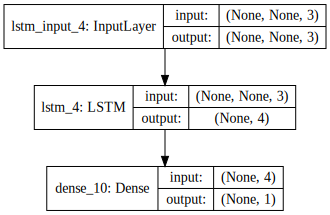

In [33]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

![svg]({{ site.baseurl }}/posts_warehouse/2017-2-4-1.svg)

---

### 모델 엮기

컴파일 시에 정의해야하는 것들
- 가중치 세트를 평가하는 데 사용할 손실함수(loss function)
 - binary_crossentropy : 이진 분류를 위한 logarithmic loss
- 네트워크의 다른 가중치를 검객하는 데 사용되는 최적화 알고리즘
 - adam : 효율적인 경사 하강법(gradient descent) 알고리즘
- 학습과정에서 수집하기 싶은 측정 기준

In [34]:
# Compile model
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )

---

### 모델 학습시키기

- nb_epoch : 데이터셋에 대한 반복 횟수
- batch_size : 네트워크에서 가중치 개갱신 전에 평가되는 인스턴스의 수

In [35]:
# Fit the model
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

Epoch 1/100
0s - loss: 0.0176
Epoch 2/100
0s - loss: 0.0062
Epoch 3/100
0s - loss: 0.0052
Epoch 4/100
0s - loss: 0.0045
Epoch 5/100
0s - loss: 0.0041
Epoch 6/100
0s - loss: 0.0036
Epoch 7/100
0s - loss: 0.0033
Epoch 8/100
0s - loss: 0.0030
Epoch 9/100
0s - loss: 0.0030
Epoch 10/100
0s - loss: 0.0028
Epoch 11/100
0s - loss: 0.0028
Epoch 12/100
0s - loss: 0.0027
Epoch 13/100
0s - loss: 0.0028
Epoch 14/100
0s - loss: 0.0026
Epoch 15/100
0s - loss: 0.0026
Epoch 16/100
0s - loss: 0.0025
Epoch 17/100
0s - loss: 0.0026
Epoch 18/100
0s - loss: 0.0025
Epoch 19/100
0s - loss: 0.0025
Epoch 20/100
0s - loss: 0.0024
Epoch 21/100
0s - loss: 0.0024
Epoch 22/100
0s - loss: 0.0024
Epoch 23/100
0s - loss: 0.0024
Epoch 24/100
0s - loss: 0.0023
Epoch 25/100
0s - loss: 0.0023
Epoch 26/100
0s - loss: 0.0023
Epoch 27/100
0s - loss: 0.0023
Epoch 28/100
0s - loss: 0.0022
Epoch 29/100
0s - loss: 0.0022
Epoch 30/100
0s - loss: 0.0022
Epoch 31/100
0s - loss: 0.0023
Epoch 32/100
0s - loss: 0.0021
Epoch 33/100
0s -

---

### 모델 사용하기

In [15]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print( Train Score: %.2f RMSE  % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print( Test Score: %.2f RMSE  % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


 32/208 [===>..........................] - ETA: 0s
acc: 94.23%


---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/Keras/2017/01/27/Keras_Lecture_Plan/)
* 이전 : [딥러닝 이야기/레이어 이야기](https://tykimos.github.io/Keras/2017/01/27/Layer_Talk/)
* 다음 : [딥러닝 기본 실습/컨볼루션 신경망 모델 만들어보기](https://tykimos.github.io/Keras/2017/02/04/CNN_Getting_Started/)